# 🌐 Graph Data Analysis: Cora Dataset 📊
The Cora dataset is a prominent graph dataset used in the domain of citation network analysis. Each node in the graph represents a scientific paper, and an edge between two nodes indicates that one paper cites the other. Each node (or paper) is also associated with a word vector representing its content and has a label indicating its research field.

# 📚 Libraries:
Let's start by importing the necessary libraries for data manipulation, visualization, and graph analysis.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd


# 📦 Loading the Dataset:
The StellarGraph library provides easy access to the Cora dataset, simplifying the loading process.

In [4]:
!wget https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz
!tar -xvzf cora.tgz

--2023-10-29 22:03:44--  https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz
Resolving linqs-data.soe.ucsc.edu (linqs-data.soe.ucsc.edu)... 128.114.47.74
Connecting to linqs-data.soe.ucsc.edu (linqs-data.soe.ucsc.edu)|128.114.47.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168052 (164K) [application/x-gzip]
Saving to: ‘cora.tgz’

cora.tgz            100%[===================>] 164.11K   598KB/s    in 0.3s    

2023-10-29 22:03:45 (598 KB/s) - ‘cora.tgz’ saved [168052/168052]

cora/
cora/README
cora/cora.cites
cora/cora.content


# 🕵️‍♂️ Exploratory Data Analysis (EDA) & 🎨 Visualization:
# 1️⃣ Load the Graph:
We'll create a graph using networkx from the Cora dataset's edges.

In [7]:
edges = pd.read_csv('cora/cora.cites', sep='\t', header=None, names=["target", "source"])
G = nx.from_pandas_edgelist(edges)


# 🕵️‍♂️ Exploratory Data Analysis (EDA) & 🎨 Visualization:
# 1️⃣ Basic Graph Overview:
Understanding the basic properties and structure of the graph.

In [8]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


Number of nodes: 2708
Number of edges: 5278


In [10]:
# Load node features
features = pd.read_csv('cora/cora.content', sep='\t', header=None, usecols=[0, 1434], index_col=0)
features.columns = ['label']
label_map = {label: idx for idx, label in enumerate(features['label'].unique())}
features['label'] = features['label'].map(label_map)


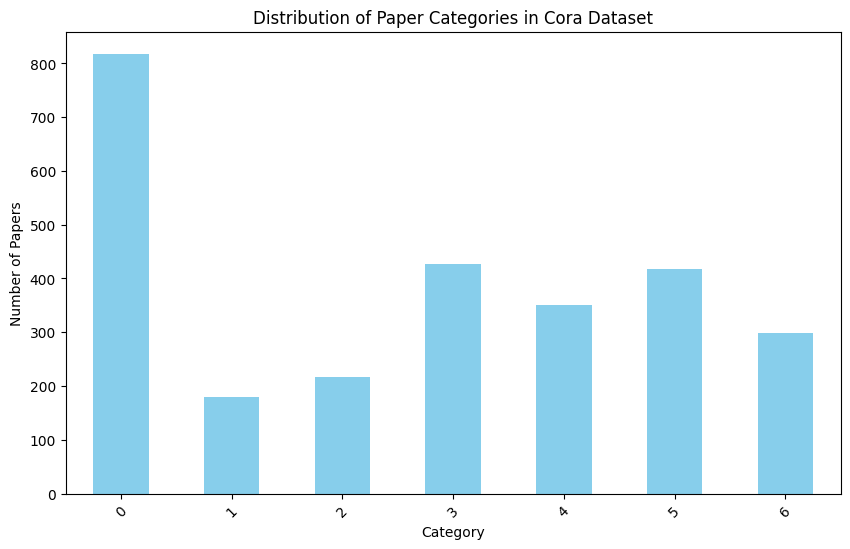

In [11]:
plt.figure(figsize=(10, 6))
features['label'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Paper Categories in Cora Dataset')
plt.xlabel('Category')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)
plt.show()


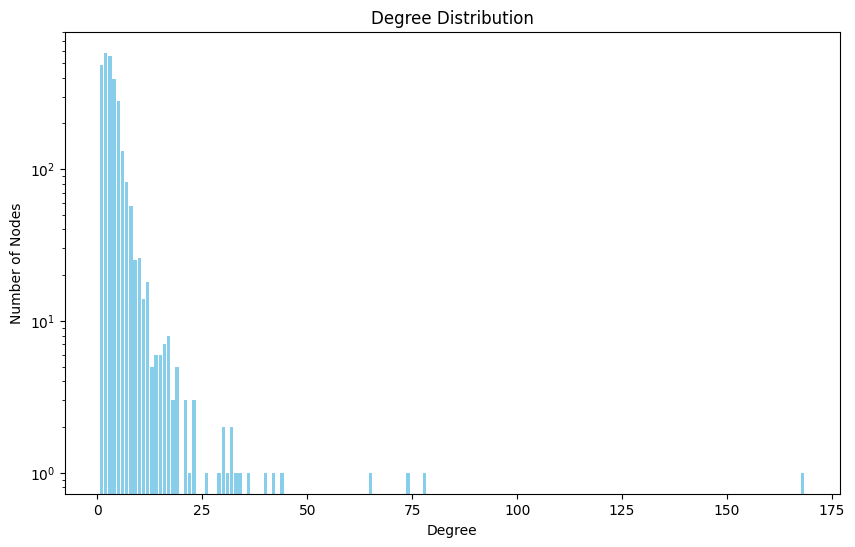

In [14]:
import collections
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = collections.Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

plt.figure(figsize=(10, 6))
plt.bar(deg, cnt, color='skyblue')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.yscale('log')
plt.show()


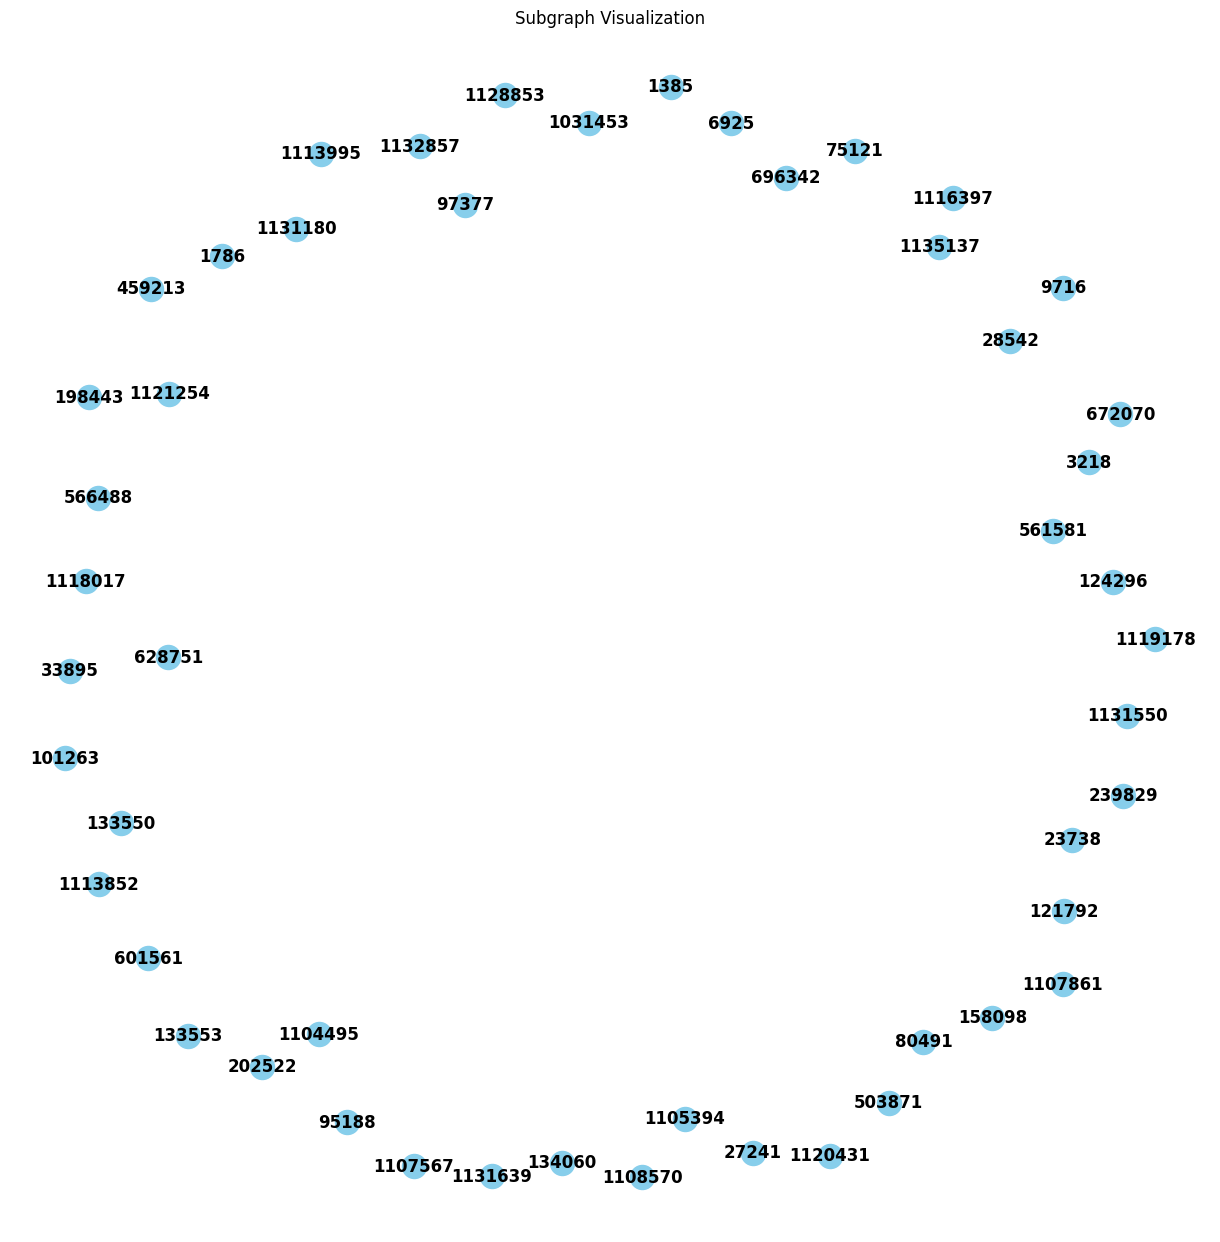

In [9]:
sub_nodes = list(np.random.choice(G.nodes(), size=50, replace=False))
subgraph = G.subgraph(sub_nodes)
pos = nx.spring_layout(subgraph)

plt.figure(figsize=(12, 12))
nx.draw(subgraph, pos, with_labels=True, node_color="skyblue", font_weight='bold')
plt.title("Subgraph Visualization")
plt.show()


This provides a basic visualization and understanding of the Cora dataset using networkx. Further processing can involve reading node features and labels, followed by more in-depth analysis and visualization.